In [2]:
import ast 
from collections import Counter
from pandas import ExcelWriter
import pandas as pd
import json

fileName = "新光金控"
filename="./_target/"+fileName+"reslut.xls"
file = pd.read_excel(filename)
print(len(file))
print(file.head(1))

38
   Unnamed: 0       公開/公告號         申請日  \
0           0  TW202117622  2019/10/16   

                                                  名稱  \
0  業務處理系統、方法及其電腦程式產品BUSINESS PROCESS SYSTEM, METH...   

                                                 申請人  \
0  臺灣新光商業銀行股份有限公司; TAIWAN SHIN KONG COMMERCIAL BA...   

                                                 IPC 引用專利  被參考次數  \
0  G06Q 20/08(2012.01); G06Q 20/18(2012.01); G06F...  NaN    NaN   

                                                專利摘要  \
0  一種業務處理方法及其系統，用於一業務提供者依據一業務請求產生對應之一業務資訊碼給一使用者後，...   

                                               摘要關鍵字  \
0  [('機台設備', 3), ('提供者', 2), ('使用者', 2), ('服務類型',...   

                                               摘要常用字  \
0  [('業務', 14), ('請求', 6), ('對應', 5), ('者', 4), (...   

                                              TF_IDF  \
0  [('提供者', 0.12), ('使用者', 0.12), ('服務類型', 0.12),...   

                                tending property  
0  {'管理': 11.0, '服務': 78.0, '分析': 11.0}       

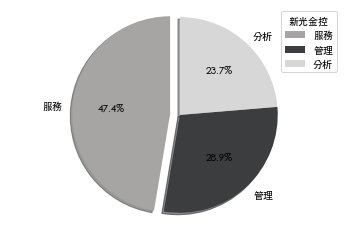

In [7]:
tend=file["property"]
pie=Counter(tend)
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Heiti TC']

labels = []
sizes = []
for x, y in pie.items():
    labels.append(x)
    sizes.append(y)

# Plot
mycolors = ["#A6A5A4", "#3C3D3E", "#D8D7D7"]
separated = (.1,0,0)

plt.pie(sizes, labels=labels,shadow = True,autopct='%1.1f%%',startangle=90,colors=mycolors,explode=separated)


plt.axis('equal')
plt.legend(title=fileName)
plt.show()